<a href="https://colab.research.google.com/github/dzhurai/Python-Projects/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Завантаження набору даних
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Study

# Assuming your data is in a CSV files
sales_df = pd.read_csv('events.csv')
product_df = pd.read_csv('products.csv')
country_df = pd.read_csv('countries.csv')



Mounted at /content/drive
/content/drive/MyDrive/Study


In [ ]:
# Перевірка на пропущені значення
print("Пропущені значення в sales_df:")
print(sales_df.isnull().sum())
print("\nПропущені значення в item_type_df:")
print(product_df.isnull().sum())
print("\nПропущені значення в country_df:")
print(country_df.isnull().sum())

# Заповнення пропущених значень в Country Code
sales_df['Country Code'] = sales_df['Country Code'].replace('#N/A', 'UNK')

# Перетворення типів даних
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m/%d/%Y')
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], format='%m/%d/%Y')

# Перевірка числових стовпців
numeric_columns = ['Units Sold', 'Unit Price', 'Unit Cost']
for col in numeric_columns:
    sales_df[col] = pd.to_numeric(sales_df[col], errors='coerce')

# Перевірка на дублікати
print("\nКількість дублікатів за Order ID:")
print(sales_df['Order ID'].duplicated().sum())

# Видалення дублікатів
sales_df = sales_df.drop_duplicates(subset=['Order ID'], keep='first')

# Злиття sales_df з item_type_df
merged_df = pd.merge(sales_df, product_df, left_on='Product ID', right_on='id', how='left')
merged_df.drop('id', axis=1, inplace=True)

# Злиття з country_df для отримання інформації про регіони
merged_df = pd.merge(merged_df, country_df[['alpha-3', 'name', 'region', 'sub-region']],
                     left_on='Country Code', right_on='alpha-3', how='left')
merged_df.drop('alpha-3', axis=1, inplace=True)

# Видалення пропущених значень в 'region', 'name', 'sub-region'

merged_df = merged_df.dropna(subset=['region', 'sub-region', 'name'])

# Перевірка на аномалії
print("\nСтатистика для числових колонок:")
print(merged_df[numeric_columns].describe())

# Перевірка на неправильні значення Order Priority
print("\nУнікальні значення Order Priority:")
print(merged_df['Order Priority'].unique())

# Обробка аномалій
# Наприклад, замінюємо нульові значення в 'Units Sold' на медіанне значення
median_units_sold = merged_df['Units Sold'].median()
merged_df['Units Sold'] = merged_df['Units Sold'].replace(0, median_units_sold)

# Збереження очищених даних
merged_df.to_csv('cleaned_sales_data.csv', index=False)

Пропущені значення в sales_df:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Пропущені значення в item_type_df:
id           0
item_type    0
dtype: int64

Пропущені значення в country_df:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Кількість дублікатів за Order ID:
0

Статистика для числових колонок:
        Units Sold   Unit Price    Unit Cost
count  1246.000000  1248.000000  1248.000000
mean   4953.186998   264.183526   186.349143
std    2915.825155   216.526905   175.473997
min       2.000000     9.330000     6.920000
25%    2349.250000    81.730000    35.840000
50%    4980.000000   154.060000    97.440000
75%    7477.000000   425.717500   263.330000
max    9999.000000   668.270000   524.960000

Унікальні значення Order Priority:
['M' 'C' 'L' 'H' ' C' 'M ']


### **Заповни або видали пропущені значення, обґрунтувавши свою думку**

*Вирішив видалити пропущені значення, щоб вони не заважали у майбутньому для більш точних розрахунків. Тестував з N\A, і мав проблему з виводом данних, так як були данні на графіку з цим самим N\A що нам не відоме. Пропущених значень мало, тому це ніяк не повпливає.*
### **Аномалії**
**Зазвичай різниця між Order_Date і Ship_Date** становить кілька днів або тижнів. Однак є записи, де відправлення відбулось того ж дня або навіть раніше за замовлення, що є неможливим:Order ID 100983083: Order_Date (2016-08-11) і Ship_Date (2016-08-11) та Order ID 200354850: різниця між Order_Date (2014-04-01) і Ship_Date (2014-05-04) становить 33 дні, що є доволі довгим терміном і може вказувати на затримки*

**Найнижча Unit_Price** і **Unit_Cost**:
Order ID 111496055, 153974950, 155914723, 159232509, 169799983, 192589318: ціна за одиницю становить лише 9.33, а вартість – 6.92 (усі для товару "Fruits"). Це значно нижче, ніж середня ціна інших товарів, що може вказувати на винятково дешевий продукт або помилку в даних*

In [ ]:
# Операції очищення вже виконані
sales_df['Country Code'] = sales_df['Country Code'].replace('#N/A', 'UNK')
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m/%d/%Y')
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'], format='%m/%d/%Y')

numeric_columns = ['Units Sold', 'Unit Price', 'Unit Cost']
for col in numeric_columns:
    sales_df[col] = pd.to_numeric(sales_df[col], errors='coerce')

print("\nКількість дублікатів за Order ID:")
print(sales_df['Order ID'].duplicated().sum())
sales_df = sales_df.drop_duplicates(subset=['Order ID'], keep='first')

# Злиття sales_df з product_df
merged_df = pd.merge(sales_df, product_df, left_on='Product ID', right_on='id', how='left')
merged_df.drop('id', axis=1, inplace=True)

# Злиття з country_df для отримання інформації про регіони
merged_df = pd.merge(merged_df, country_df[['alpha-3', 'name', 'region', 'sub-region']],
                     left_on='Country Code', right_on='alpha-3', how='left')
merged_df.drop('alpha-3', axis=1, inplace=True)

# Заповнення пропущених значень в 'region' та 'sub-region'
#merged_df['region'] = merged_df['region'].fillna('N/A')
#merged_df['sub-region'] = merged_df['sub-region'].fillna('N/A')
#merged_df['name'] = merged_df['name'].fillna('N/A')
merged_df = merged_df.dropna(subset=['region', 'sub-region', 'name'])

# Перевірка на аномалії вже проведена

# Обробка аномалій вже виконана

# Перейменування колонок для ясності
renaming_dict = {
    'Country Code': 'Country_Code',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Order Priority': 'Order_Priority',
    'Product ID': 'Product_ID',
    'Sales Channel': 'Sales_Channel',
    'Units Sold': 'Units_Sold',
    'Unit Price': 'Unit_Price',
    'Unit Cost': 'Unit_Cost',
    'item_type': 'Item_Type',
    'name': 'Country_Name'

}

merged_df = merged_df.rename(columns=renaming_dict)

# Видалення непотрібних колонок (якщо є)
# Наприклад, якщо 'item_type' не потрібен після перейменування
# merged_df.drop('item_type', axis=1, inplace=True) - цей рядок можна додати, якщо 'item_type' не потрібен

# Збереження очищених даних
merged_df.to_csv('cleaned_sales_data.csv', index=False)

print(merged_df.columns)


Кількість дублікатів за Order ID:
0
Index(['Order ID', 'Order_Date', 'Ship_Date', 'Order_Priority', 'Country_Code',
       'Product_ID', 'Sales_Channel', 'Units_Sold', 'Unit_Price', 'Unit_Cost',
       'Item_Type', 'Country_Name', 'region', 'sub-region'],
      dtype='object')


In [ ]:
#Загальна кількість замовлень
total_orders = merged_df['Order ID'].nunique()
print(f"Загальна кількість замовлень: {total_orders}")

#Загальний прибуток
merged_df['Total Revenue'] = merged_df['Units_Sold'] * merged_df['Unit_Price']
merged_df['Total Cost'] = merged_df['Units_Sold'] * merged_df['Unit_Cost']
merged_df['Profit'] = merged_df['Total Revenue'] - merged_df['Total Cost']
total_profit = merged_df['Profit'].sum()
print(f"Загальний прибуток: {total_profit:.2f}$")

#Загальна кількість охоплених країн
total_countries = merged_df['Country_Code'].nunique()
print(f"Загальна кількість охоплених країн: {total_countries}")

#Середня кількість проданих одиниць на замовлення
avg_units_per_order = merged_df.groupby('Order ID')['Units_Sold'].mean().mean()
print(f"Середня кількість проданих одиниць на замовлення: {avg_units_per_order:.2f}")

Загальна кількість замовлень: 1248
Загальний прибуток: 473709035.06$
Загальна кількість охоплених країн: 45
Середня кількість проданих одиниць на замовлення: 4953.19


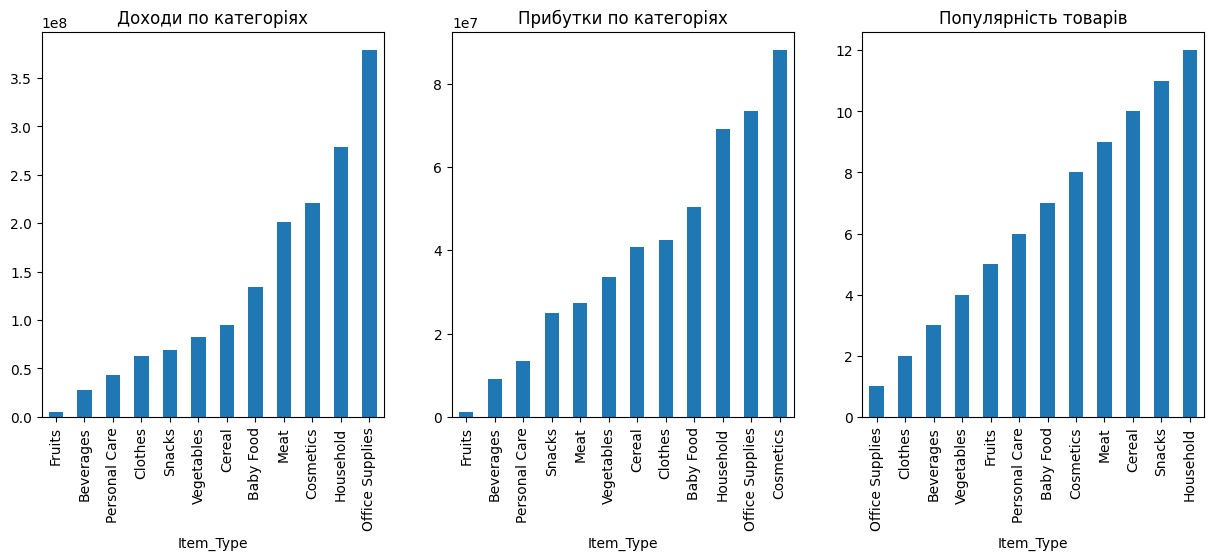

In [ ]:
merged_df['Total Revenue'] = merged_df['Units_Sold'] * merged_df['Unit_Price']
merged_df['Total Cost'] = merged_df['Units_Sold'] * merged_df['Unit_Cost']
merged_df['Profit'] = merged_df['Total Revenue'] - merged_df['Total Cost']

# 1. Аналіз за категоріями товарів:

# Доходи, витрати, прибутки
category_metrics = merged_df.groupby('Item_Type').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

# Популярність товарів
category_metrics['Popularity'] = category_metrics['Units_Sold'].rank(ascending=False)

# Графік
plt.figure(figsize=(15, 5))
plt.subplot(131)
category_metrics.set_index('Item_Type')['Total Revenue'].sort_values().plot(kind='bar', title='Доходи по категоріях')
plt.subplot(132)
category_metrics.set_index('Item_Type')['Profit'].sort_values().plot(kind='bar', title='Прибутки по категоріях')
plt.subplot(133)
category_metrics.set_index('Item_Type')['Popularity'].sort_values().plot(kind='bar', title='Популярність товарів')
plt.show()

### Висновки
**Фокус на прибутковості:** Інвестувати ресурси в категорії з високим прибутком і маржею, такі як "Office Supplies" і "Household".

**Збільшення маржі:** Для популярних, але менш прибуткових категорій (наприклад, "Fruits", "Clothes") розглянути підвищення цін, зниження витрат або додавання преміум-продуктів.

**Маркетинг і просування:** Використовувати популярні товари для залучення клієнтів, а потім пропонувати більш прибуткові продукти.

**Моніторинг аномалій:** Регулярно перевіряти дані на наявність нетипових значень, щоб уникнути неправильних бізнес-рішень.*

**Бізнес-логіка:** Перед прийняттям стратегічних рішень необхідно провести аудит даних, щоб усунути помилки. Також варто аналізувати регіональні особливості: наприклад, якщо маленькі країни (Сан-Марино, Андорра) показують незвичайно високі продажі, це може бути результатом специфічного попиту або помилки в даних.

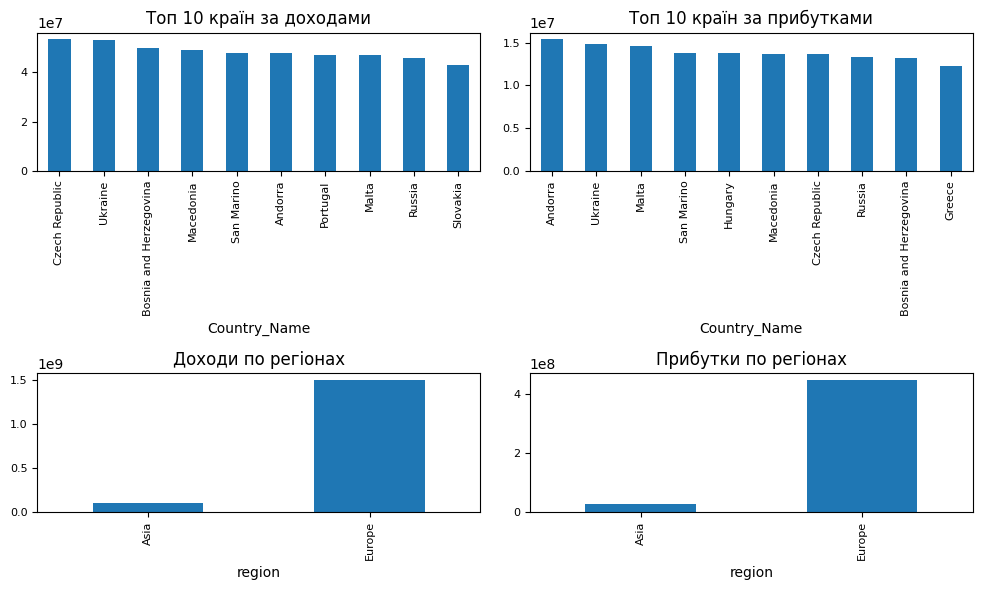

In [ ]:
# 2. Аналіз за географією:
# Before grouping, calculate the necessary columns
merged_df['Total Revenue'] = merged_df['Units_Sold'] * merged_df['Unit_Price']
merged_df['Total Cost'] = merged_df['Units_Sold'] * merged_df['Unit_Cost']
merged_df['Profit'] = merged_df['Total Revenue'] - merged_df['Total Cost']
# За країнами
country_metrics = merged_df.groupby('Country_Name').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

# За регіонами
region_metrics = merged_df.groupby('region').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

# Графіки
plt.figure(figsize=(10, 6))
plt.subplot(221)
country_metrics.set_index('Country_Name')['Total Revenue'].nlargest(10).plot(kind='bar', title='Топ 10 країн за доходами',fontsize=8)
plt.subplot(222)
country_metrics.set_index('Country_Name')['Profit'].nlargest(10).plot(kind='bar', title='Топ 10 країн за прибутками', fontsize=8)
plt.subplot(223)
region_metrics.set_index('region')['Total Revenue'].plot(kind='bar', title='Доходи по регіонах', fontsize=8)
plt.subplot(224)
region_metrics.set_index('region')['Profit'].plot(kind='bar', title='Прибутки по регіонах', fontsize=8)
plt.tight_layout()
plt.show()

**Фокус на топ-ринки:** Інвестувати в країни та регіони з найбільшими доходами та прибутками, такі як Західна Європа або ключові країни (Німеччина, Франція).

**Оптимізація витрат:** Аналізувати країни та регіони з низькою маржею, щоб зменшити витрати на логістику, маркетинг або імпорт.

**Розширення присутності:** Розглянути можливість входу на нові ринки в регіонах з потенціалом, таких як Східна Європа, якщо бар’єри можна усунути.

**Моніторинг аномалій:** Регулярно перевіряти дані для маленьких країн або регіонів з нетиповими показниками, щоб уникнути помилкових рішень.

**Бізнес-логіка:** Необхідно провести додатковий аудит даних для цих країн, щоб виключити помилки. Якщо дані коректні, компанії варто адаптувати стратегію для таких ринків, можливо, пропонуючи спеціалізовані продукти або послуги. Для великих регіонів, таких як Східна Європа, варто дослідити бар’єри (митні правила, логістика), які можуть знижувати прибутковість.

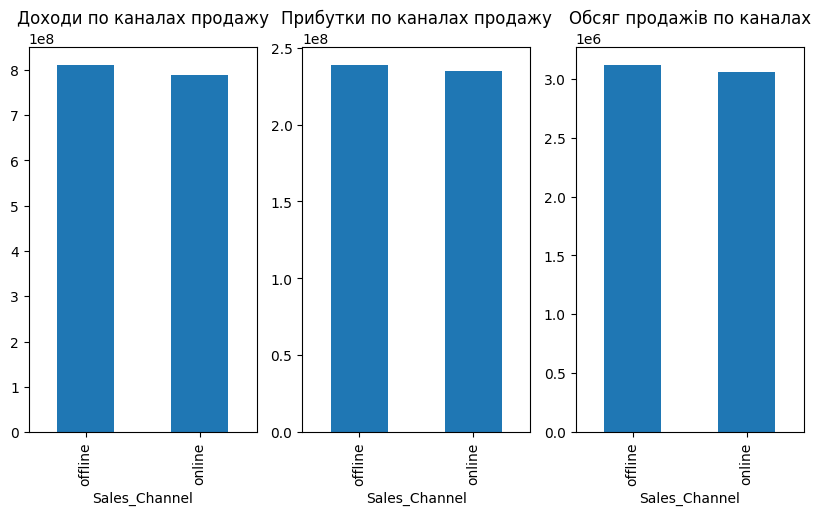

In [ ]:
# 3. Аналіз за каналами продажу:
merged_df['Sales_Channel'] = merged_df['Sales_Channel'].str.strip().str.lower()
channel_metrics = merged_df.groupby('Sales_Channel').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

# Графік
plt.figure(figsize=(10, 5))
plt.subplot(131)
channel_metrics.set_index('Sales_Channel')['Total Revenue'].plot(kind='bar', title='Доходи по каналах продажу')
plt.subplot(132)
channel_metrics.set_index('Sales_Channel')['Profit'].plot(kind='bar', title='Прибутки по каналах продажу')
plt.subplot(133)
channel_metrics.set_index('Sales_Channel')['Units_Sold'].plot(kind='bar', title='Обсяг продажів по каналах')
plt.show()

**Фокус на лідируючий канал:** Інвестувати в канал з найбільшими доходами та прибутками (онлайн чи офлайн), покращуючи його ефективність.

**Оптимізація менш прибуткового каналу:** Якщо, наприклад, офлайн-канал менш прибутковий, розглянути його реструктуризацію або закриття неефективних точок.

**Інтеграція каналів:** Створити синергію між онлайн і офлайн, наприклад, дозволяючи клієнтам замовляти онлайн і забирати офлайн, або навпаки.

**Моніторинг тенденцій:** Регулярно аналізувати, як змінюються переваги клієнтів, і адаптувати стратегію (наприклад, якщо онлайн стає дедалі популярнішим, інвестувати в цифрові технології).

**Бізнес-логіка:** Компанія повинна балансувати між каналами. Для онлайн-каналу варто підвищити маржу, можливо, через таргетовані пропозиції або преміум-продукти. Для офлайн-каналу, якщо він буде менш прибутковий у майбутньому, можна розглянути оптимізацію витрат або закриття менш ефективних точок.

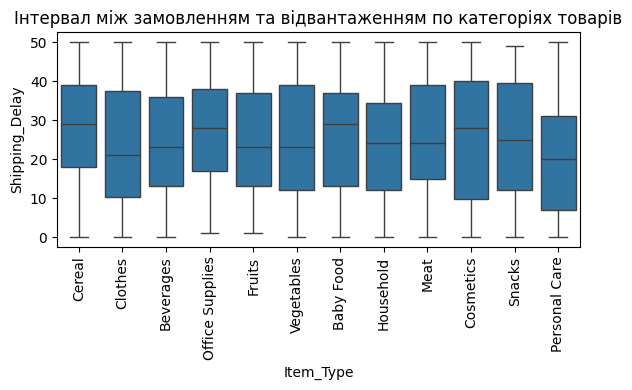

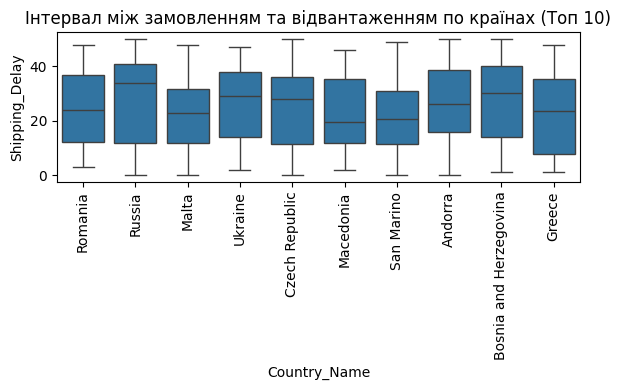

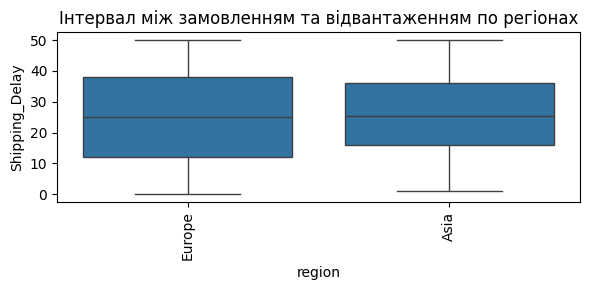

Середня затримка відвантаження по категоріях:
Item_Type
Personal Care      20.403670
Clothes            23.539216
Household          23.571429
Beverages          23.946903
Vegetables         24.438095
Fruits             24.475728
Snacks             25.263158
Meat               25.669903
Cosmetics          25.879630
Baby Food          26.647619
Cereal             27.198020
Office Supplies    27.283186
Name: Shipping_Delay, dtype: float64

Середня затримка відвантаження по країнах (Топ 10):
Country_Name
Malta                     21.562500
San Marino                21.700000
Greece                    23.000000
Macedonia                 23.218750
Romania                   24.941176
Czech Republic            25.225806
Ukraine                   25.757576
Bosnia and Herzegovina    26.060606
Andorra                   26.275000
Russia                    27.375000
Name: Shipping_Delay, dtype: float64

Середня затримка відвантаження по регіонах:
region
Europe    24.777873
Asia      26.085366
Name

In [ ]:
# Обчислення інтервалу часу між замовленням та відвантаженням в днях
merged_df['Shipping_Delay'] = (merged_df['Ship_Date'] - merged_df['Order_Date']).dt.days

# 1. Аналіз по категоріях товарів
plt.figure(figsize=(6, 4))
sns.boxplot(x='Item_Type', y='Shipping_Delay', data=merged_df)
plt.title('Інтервал між замовленням та відвантаженням по категоріях товарів')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Аналіз по країнах (показуємо топ 10 країн за кількістю замовлень)
top_countries = merged_df['Country_Name'].value_counts().nlargest(10).index
plt.figure(figsize=(6, 4))
sns.boxplot(x='Country_Name', y='Shipping_Delay', data=merged_df[merged_df['Country_Name'].isin(top_countries)])
plt.title('Інтервал між замовленням та відвантаженням по країнах (Топ 10)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Аналіз по регіонах
plt.figure(figsize=(6, 3))
sns.boxplot(x='region', y='Shipping_Delay', data=merged_df)
plt.title('Інтервал між замовленням та відвантаженням по регіонах')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Додатковий аналіз: середнє значення затримки по категоріях, країнах і регіонах
print("Середня затримка відвантаження по категоріях:")
print(merged_df.groupby('Item_Type')['Shipping_Delay'].mean().sort_values())

print("\nСередня затримка відвантаження по країнах (Топ 10):")
print(merged_df[merged_df['Country_Name'].isin(top_countries)].groupby('Country_Name')['Shipping_Delay'].mean().sort_values())

print("\nСередня затримка відвантаження по регіонах:")
print(merged_df.groupby('region')['Shipping_Delay'].mean().sort_values())

**Фокус на проблемні зони:** Інвестувати в категорії, країни та регіони з найбільшими затримками, покращуючи логістику, постачання та митні процедури.

**Оптимізація процесів:** Використовувати успішні приклади (категорії або регіони з короткими затримками) для інших сегментів, наприклад, створюючи централізовані склади або автоматизуючи логістику.

**Моніторинг задоволеності клієнтів:** Довгі затримки можуть негативно впливати на репутацію. Необхідно оцінити, як затримки впливають на лояльність клієнтів, і, можливо, запропонувати компенсації (знижки, швидка доставка) для пом’якшення наслідків.

**Аналіз даних:** Регулярно перевіряти дані на аномалії, такі як від’ємні затримки (якщо такі є), або надзвичайно довгі терміни, щоб уникнути помилок у плануванні.

**Бізнес-логіка:** Компанія повинна інтегрувати дані з різних рівнів (категорії, країни, регіони), щоб знайти корінь проблеми. Наприклад, якщо Західна Європа має короткі затримки, але Східна Європа – довгі, варто перенести деякі практики (наприклад, швидші перевізники) з одного регіону до іншого. Але в середньому доставка усюди однакова. Можливо деяки критично важливі продукти(по дохідності) повинні доставлятися швидше, про що треба думати в першу чергу, для кращої дохідності і впливу на ринку.

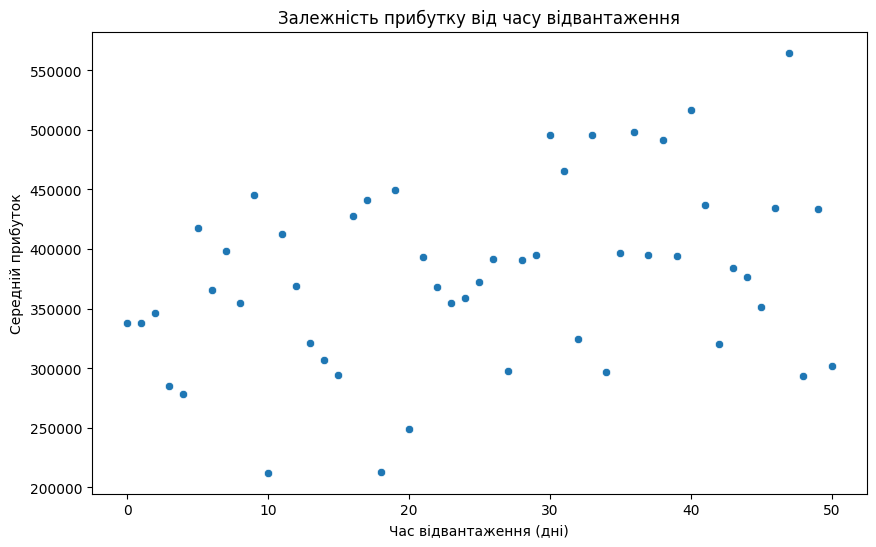

Кореляція між затримкою відвантаження та прибутком: 0.06


In [ ]:
# Обчислення інтервалу між замовленням і відвантаженням
merged_df['Shipping_Delay'] = (merged_df['Ship_Date'] - merged_df['Order_Date']).dt.days

# Групування за затримкою відвантаження та обчислення середнього прибутку
delay_profit = merged_df.groupby('Shipping_Delay')['Profit'].mean().reset_index()

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping_Delay', y='Profit', data=delay_profit)
plt.title('Залежність прибутку від часу відвантаження')
plt.xlabel('Час відвантаження (дні)')
plt.ylabel('Середній прибуток')
plt.show()

# Кореляція між затримкою і прибутком
correlation = merged_df['Shipping_Delay'].corr(merged_df['Profit'])
print(f"Кореляція між затримкою відвантаження та прибутком: {correlation:.2f}")

**Кореляція між затримкою відвантаження та прибутком: 0.06.**

Що означає - някої кореляції немає. От же прибуток не залежить від часу віндвантаження. Але можна звернути увагу на деякі країни та продукти, які б можна було оптимізувати з огляду доставки і в подальшому мати більше продажів на ринку.

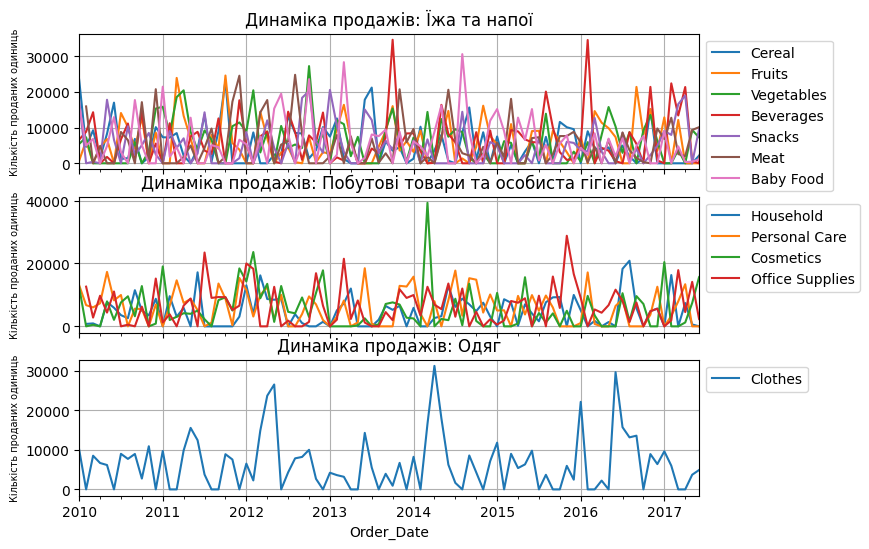

In [ ]:
# Встановлюємо 'Order_Date' як індекс для часових операцій
if 'Order_Date' in merged_df.columns:
    merged_df.set_index('Order_Date', inplace=True)
# Групи за тематикою
food_drinks = ['Cereal', 'Fruits', 'Vegetables', 'Beverages', 'Snacks', 'Meat', 'Baby Food']
household_care = ['Household', 'Personal Care', 'Cosmetics', 'Office Supplies']
clothes = ['Clothes']

# Список груп для ітерації
groups = {
    'Їжа та напої': food_drinks,
    'Побутові товари та особиста гігієна': household_care,
    'Одяг': clothes
}

# Створюємо сітку графіків: 3 рядки, 1 колонка
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6), sharex=True)

# Ітерація по групах і підграфіках
for ax, (group_name, item_types) in zip(axs, groups.items()):
    for item_type in item_types:
        # Фільтруємо дані по категорії та агрегуємо по місяцях
        item_sales = merged_df[merged_df['Item_Type'] == item_type]['Units_Sold'].resample('ME', level='Order_Date').sum()
        item_sales.plot(label=item_type, ax=ax)

    # Налаштування для кожного підграфіка
    ax.set_title(f'Динаміка продажів: {group_name}')
    ax.set_ylabel('Кількість проданих одиниць',fontsize=7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)


# Список груп для ітерації
groups = {
    'Їжа та напої': food_drinks,
    'Побутові товари та особиста гігієна': household_care,
    'Одяг': clothes
}






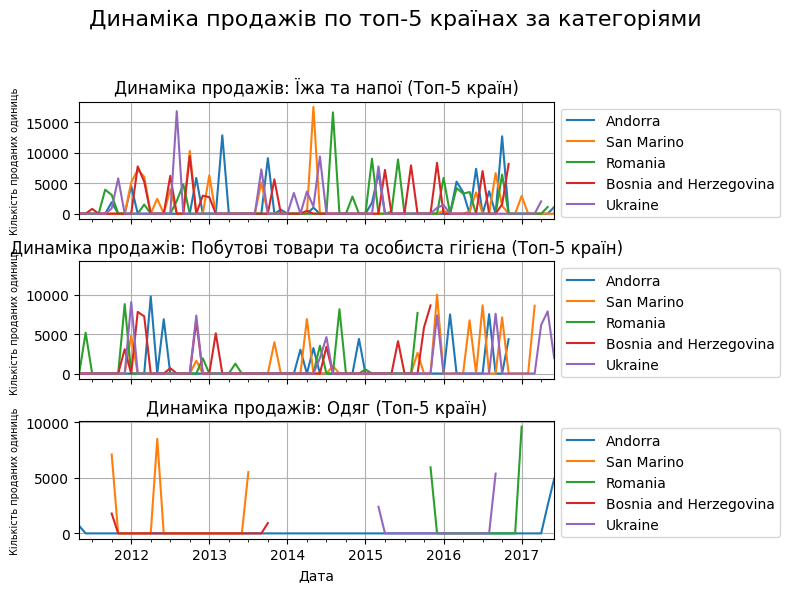

In [ ]:
# Визначаємо топ-5 країн за загальною кількістю продажів
top_countries = merged_df['Country_Name'].value_counts().nlargest(5).index

# Створюємо сітку графіків для топ-5 країн: 3 рядки, 1 колонка
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6), sharex=True)

# Ітерація по групах і підграфіках для топ-5 країн
for ax, (group_name, item_types) in zip(axs, groups.items()):
    for country in top_countries:
        # Фільтруємо дані по країні та категорії, агрегуємо по місяцях
        country_sales = merged_df[(merged_df['Country_Name'] == country) &
                                  (merged_df['Item_Type'].isin(item_types))]['Units_Sold'].resample('ME').sum()
        country_sales.plot(label=country, ax=ax)

    # Налаштування для кожного підграфіка
    ax.set_title(f'Динаміка продажів: {group_name} (Топ-5 країн)')
    ax.set_ylabel('Кількість проданих одиниць', fontsize=7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)  # Додаємо сітку

# Загальні налаштування
fig.suptitle('Динаміка продажів по топ-5 країнах за категоріями', fontsize=16)
plt.xlabel('Дата')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Залишаємо місце для загального заголовка
plt.show()

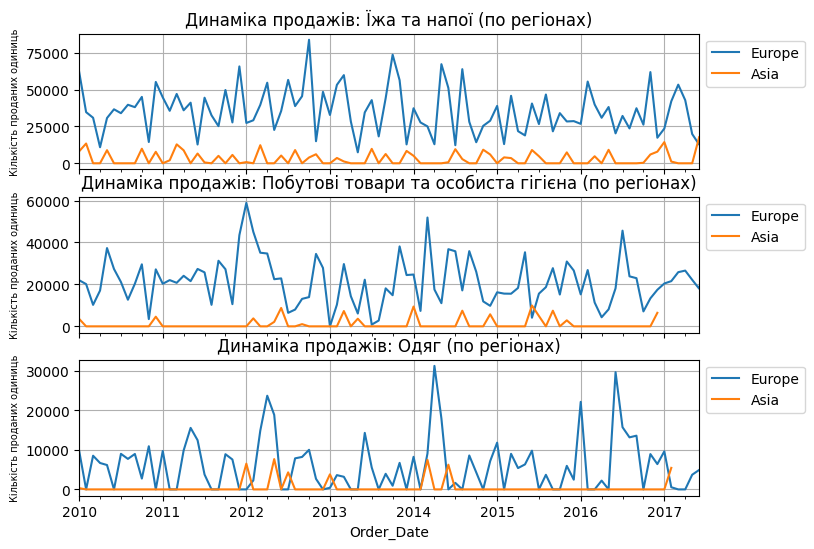

In [ ]:
# Створюємо сітку графіків: 3 рядки, 1 колонка
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6), sharex=True)

# Ітерація по групах і підграфіках для регіонів
for ax, (group_name, item_types) in zip(axs, groups.items()):
    for region in merged_df['region'].unique():
        # Фільтруємо дані по регіону та категорії, агрегуємо по місяцях
        region_sales = merged_df[(merged_df['region'] == region) &
                                 (merged_df['Item_Type'].isin(item_types))]['Units_Sold'].resample('ME').sum()
        region_sales.plot(label=region, ax=ax)

    # Налаштування для кожного підграфіка
    ax.set_title(f'Динаміка продажів: {group_name} (по регіонах)')
    ax.set_ylabel('Кількість проданих одиниць', fontsize=7)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)  # Додаємо сітку

**Фокус на зростаючих сегментах:** Інвестувати в категорії, країни та регіони з позитивною динамікою продажів, розширюючи асортимент, маркетинг і логістику.

**Оптимізація проблемних зон:** Аналізувати сегменти зі спадом або волатильністю, щоб знайти причини (конкуренція, логістика, економічні фактори) і розробити корективи.

**Планування на основі трендів:** Використовувати дані для прогнозування попиту, особливо враховуючи сезонність і регіональні особливості.

**Моніторинг ринку:** Регулярно оновлювати аналіз, щоб відстежувати нові тренди та адаптуватися до змін у поведінці клієнтів.

**Бізнес-логіка:** Компанія повинна інтегрувати дані з різних рівнів, щоб виявити системні проблеми або можливості. Наприклад, якщо продаж "Clothes" зростає в усіх регіонах, це може бути сигналом для розширення цієї категорії. Якщо ж певний регіон або країна відстає, варто провести детальний аналіз і адаптувати стратегію.

**Ринок Азії займає дуже маленьку частку в продажах**, але їх ринок дуже великий, тому має сенс звернути увагу, та перевірити взаємодію з їх ринком, так як це може принести великий дохід. Але перед цим треба знати з якими конкурентами ми стикнемось, атже їх ринок є дуже дешевим  і їх компанії мають великий обсяг локальних товарів == вплив.


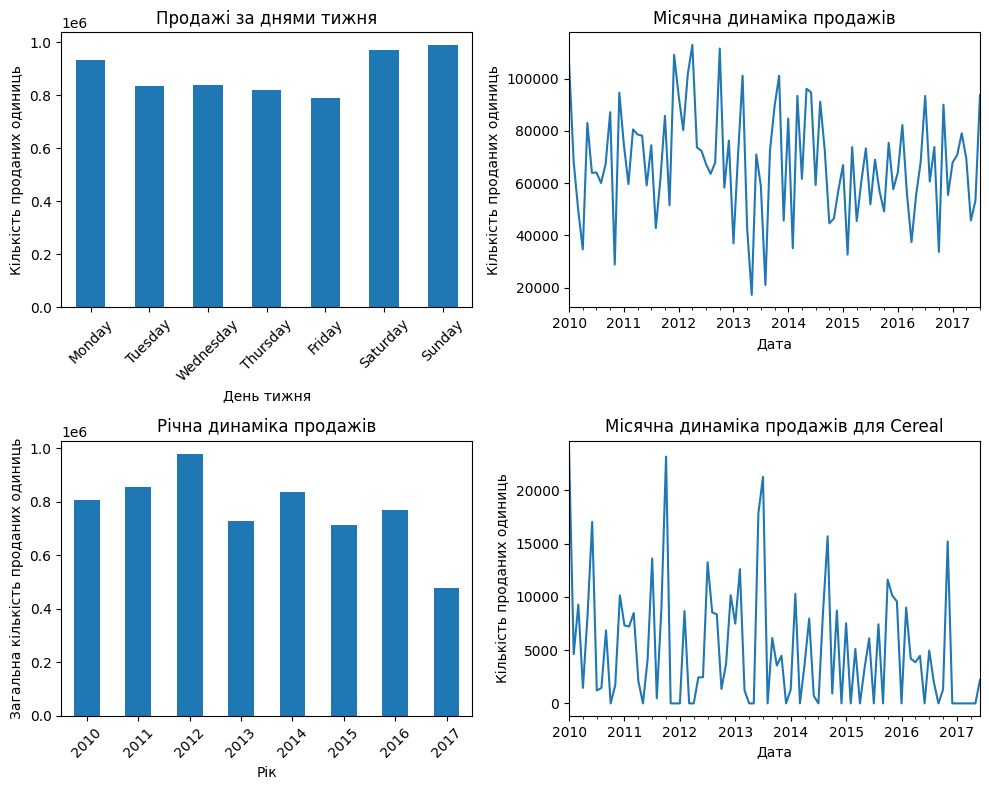

In [ ]:
# Assuming 'merged_df' is already defined and contains the data
# Parse dates if not already done
if 'Order_Date' not in merged_df.columns:
    merged_df = merged_df.reset_index()

merged_df['Order_Date'] = pd.to_datetime(merged_df['Order_Date'])
merged_df.set_index('Order_Date', inplace=True)

# Додаємо дні тижня
merged_df['Day_of_Week'] = merged_df.index.day_name()

# Аналізуємо продажі по дням
sales_by_day = merged_df.groupby('Day_of_Week')['Units_Sold'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Аналізуємо продажі по місяцям і ррокам
monthly_sales = merged_df['Units_Sold'].resample('ME').sum()
yearly_sales = monthly_sales.groupby(monthly_sales.index.year).sum()

# Налаштування сітки графіків
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Продажі по дням
sales_by_day.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Продажі за днями тижня')
axs[0, 0].set_xlabel('День тижня')
axs[0, 0].set_ylabel('Кількість проданих одиниць')
axs[0, 0].tick_params(axis='x', rotation=45)

# Місячні продажі, тренди
monthly_sales.plot(ax=axs[0, 1])
axs[0, 1].set_title('Місячна динаміка продажів')
axs[0, 1].set_xlabel('Дата')
axs[0, 1].set_ylabel('Кількість проданих одиниць')

# Продажі по роках
yearly_sales.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Річна динаміка продажів')
axs[1, 0].set_xlabel('Рік')
axs[1, 0].set_ylabel('Загальна кількість проданих одиниць')
axs[1, 0].tick_params(axis='x', rotation=45)

# Місячна динаміка для прикладу по одному продукту у розрізі років.
item_type = merged_df['Item_Type'].unique()[0]  # First item type for example
item_sales = merged_df[merged_df['Item_Type'] == item_type]['Units_Sold'].resample('ME').sum()
item_sales.plot(ax=axs[1, 1])
axs[1, 1].set_title(f'Місячна динаміка продажів для {item_type}')
axs[1, 1].set_xlabel('Дата')
axs[1, 1].set_ylabel('Кількість проданих одиниць')

plt.tight_layout()
plt.show()

**Фокус на пікові періоди:** Інвестувати в дні, місяці та роки з високими продажами, забезпечуючи достатні ресурси (склади, персонал, маркетинг) для задоволення попиту.

**Стимулювання низьких періодів:** Для днів тижня, місяців чи років зі спадом продажів запускати акції, знижки або нові продукти, щоб стимулювати попит.

**Планування на основі трендів:** Використовувати дані для прогнозування попиту, враховуючи сезонність, дні тижня та річні тренди.

**Моніторинг ринку:** Регулярно оновлювати аналіз, щоб відстежувати зміни в поведінці клієнтів і адаптуватися до нових умов.

**Бізнес-логіка:** Компанія повинна інтегрувати дані з різних рівнів, щоб знайти оптимальну стратегію. Наприклад, якщо вихідні є піковими, варто посилити онлайн- і офлайн-канали у цей період. Найкращими днями для великих продаж є свята, треба сфокусуватись на ці дні і мати достатній обсяг продуктів на локаціях(складах) до самої дати, з урахуванням доставки, що є приблизно 20 - 27 днів.